In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# Intentemos encontrar la seccion de Poincare del problema de Kepler

### $L = \dfrac{m}{2}(x'^2+y'^2) + k\sqrt{x^2+y^2}^{-1}$

Las ecuaciones de movimiento son:
#### $mx'' = -\dfrac{kx}{(x'^2+y'^2)^{3/2}}$
#### $my'' = -\dfrac{ky}{(x'^2+y'^2)^{3/2}}$

Se pueden resolver numericamente desarrollando en potencias de $\Delta t$ a primer orden:

#### $x'(t+\Delta t) = x'(t) + x''(t)\Delta t $
#### $x''(t) = \dfrac{1}{\Delta t}(x'(t+\Delta t) - x'(t)) $
Basicamente es la definicion de derivada :P

<br>
<br>

Asi que:
#### $x'(t+\Delta t) = x'(t)  -\dfrac{kx}{(x'^2+y'^2)^{3/2}}\dfrac{\Delta t}{m} $
#### $x(t+\Delta t) = x(t) + x'(t)\Delta t$
<br>

#### $y'(t+\Delta t) = y'(t)  -\dfrac{ky}{(x'^2+y'^2)^{3/2}}\dfrac{\Delta t}{m} $
#### $y(t+\Delta t) = y(t) + y'(t)\Delta t$


In [8]:
def get_next(x,y,vx,vy,dt,k, m):
    vy_next = vy - (dt/m)*(k*y)/(x**2+y**2)**(3/2)
    y_next = y + vy*dt
    
    vx_next = vx - (dt/m)*(k*x)/(x**2+y**2)**(3/2)
    x_next = x + vx*dt
    
    return x_next, y_next, vx_next, vy_next

In [9]:
def iterate(x0, y0, vx0, vy0, dt, k, m, N):
    xs = [x0]
    ys = [y0]
    vxs = [vx0]
    vys = [vy0]
    
    for i in range(N):
        next_ = get_next(xs[-1], ys[-1], vxs[-1], vys[-1], dt, k, m)
        xs.append(next_[0])
        ys.append(next_[1])
        vxs.append(next_[2])
        vys.append(next_[3])
    
    return np.array(xs), np.array(ys), np.array(vxs), np.array(vys)

### Grafiqemos el potencial efectivo

In [4]:
def effective_potential(r, k, m, l):
    veff = -k/r + (l**2)/(2*m*r**2)
    return veff

Text(0, 0.5, '$V_{eff}(r)$')

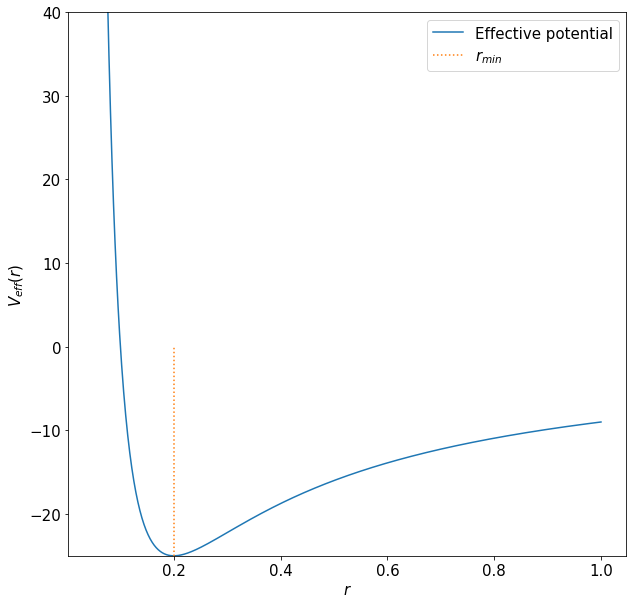

In [6]:
#Parametros que definen el potencial
k = 10
m = 0.5
l = 1
r0 = l**2/(k*m)

r = np.linspace(0.05, 1, 1000)
eff_pot = effective_potential(r, k, m, l)

plt.figure(figsize=(10,10))
plt.plot(r, eff_pot, label='Effective potential')
plt.plot([r0, r0], [min(eff_pot), 0], ls=':', label='$r_{min}$')
plt.legend()
plt.ylim([min(eff_pot), 40])
plt.xlabel('$r$')
plt.ylabel('$V_{eff}(r)$')

### Resolvamos de manera iterativa

In [10]:
x0 = r0
y0 = 0
vx0 = 0 
Emin = min(eff_pot)
E = -5
vy0 = ((2/m)*(E+k/x0))**(1/2)

dt = 0.0001
N = 30*int(1/dt)
coordinates = iterate(x0, y0, vx0, vy0, dt, k, m, N)

Text(0, 0.5, 'y')

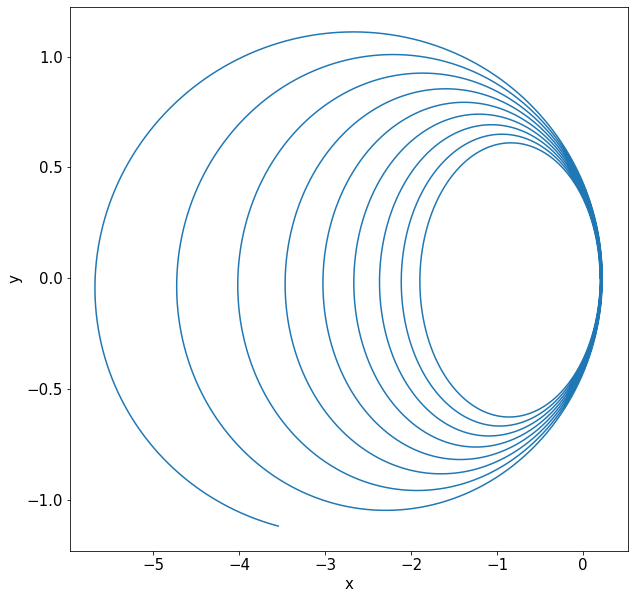

In [11]:
plt.figure(figsize=(10,10))
plt.plot(coordinates[0], coordinates[1])
plt.xlabel('x')
plt.ylabel('y')


In [12]:
x0 = r0
y0 = 0
vx0 = 0 
Emin = min(eff_pot)
E = -5
vy0 = ((2/m)*(E+k/x0))**(1/2)

dt = 0.000001
N = 3*int(1/dt)
coordinates = iterate(x0, y0, vx0, vy0, dt, k, m, N)

Text(0, 0.5, 'y')

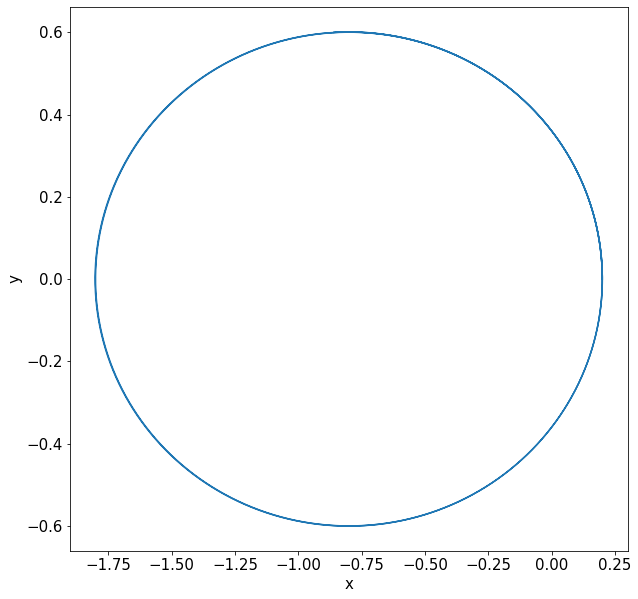

In [13]:
plt.figure(figsize=(10,10))
plt.plot(coordinates[0], coordinates[1])
plt.xlabel('x')
plt.ylabel('y')

### Ahora busquemos las intersecciones en el plano $x$ - $v_x$

In [36]:
np.sign?

Call signature:  np.sign(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sign'>
File:            ~/Documents/pycms/lib64/python3.6/site-packages/numpy/__init__.py
Docstring:      
sign(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Returns an element-wise indication of the sign of a number.

The `sign` function returns ``-1 if x < 0, 0 if x==0, 1 if x > 0``.  nan
is returned for nan inputs.

For complex inputs, the `sign` function returns
``sign(x.real) + 0j if x.real != 0 else sign(x.imag) + 0j``.

complex(nan, 0) is returned for complex nan inputs.

Parameters
----------
x : array_like
    Input values.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have leng

In [35]:
np.diff?

Signature: np.diff(a, n=1, axis=-1, prepend=<no value>, append=<no value>)
Docstring:
Calculate the n-th discrete difference along the given axis.

The first difference is given by ``out[i] = a[i+1] - a[i]`` along
the given axis, higher differences are calculated by using `diff`
recursively.

Parameters
----------
a : array_like
    Input array
n : int, optional
    The number of times values are differenced. If zero, the input
    is returned as-is.
axis : int, optional
    The axis along which the difference is taken, default is the
    last axis.
prepend, append : array_like, optional
    Values to prepend or append to `a` along axis prior to
    performing the difference.  Scalar values are expanded to
    arrays with length 1 in the direction of axis and the shape
    of the input array in along all other axes.  Otherwise the
    dimension and shape must match `a` except along axis.

    .. versionadded:: 1.16.0

Returns
-------
diff : ndarray
    The n-th differences. The shape o

In [37]:
np.argwhere?

Signature: np.argwhere(a)
Docstring:
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : (N, a.ndim) ndarray
    Indices of elements that are non-zero. Indices are grouped by element.
    This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
    non-zero items.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
but produces a result of the correct shape for a 0D array.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``nonzero(a)`` instead.

Examples
--------
>>> x = np.arange(6).reshape(2,3)
>>> x
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argwhere(x>1)
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])
File:      ~/Documents/pycms/lib64/python3.6/site-packages/numpy/core/numeric.py
Type:      function


In [14]:
idx = np.argwhere(np.diff(np.sign(coordinates[1]))).flatten()
x_values = np.array(coordinates[0])[idx]
vx_values = np.array(coordinates[2])[idx]

Text(0, 0.5, '$v_x$')

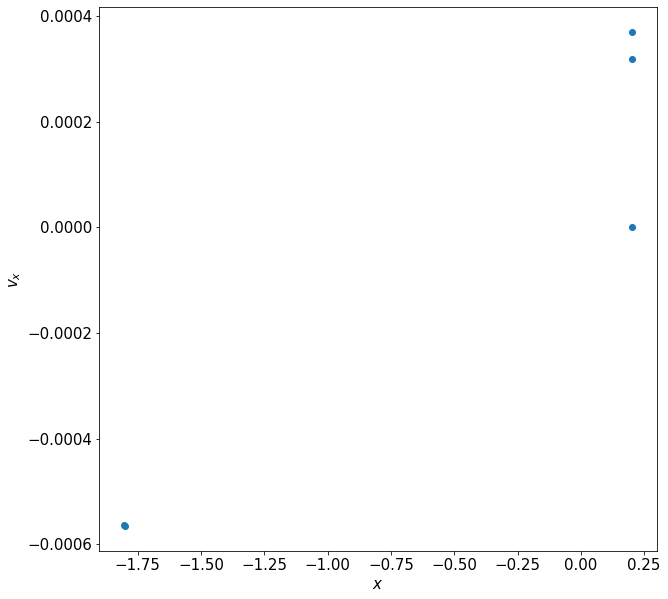

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x_values, vx_values)
plt.xlabel('$x$')
plt.ylabel('$v_x$')

<br>
<br>

## Ahora apliquemos una perturbacion $\gamma/ r^{-3}$

In [20]:
def perturbated_potential(r,k, g, m,l):
    veff = -k/r -g/r**3 + (l**2)/(2*m*r**2) 
    return veff

Text(0, 0.5, '$V_{eff}(r)$')

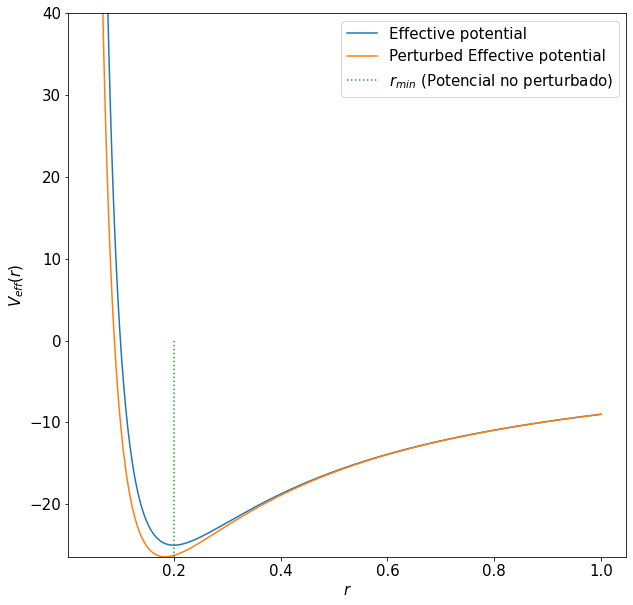

In [21]:
#Parametros que definen el potencial
k = 10
m = 0.5
l = 1
g = 0.01
r0 = l**2/(k*m)

r = np.linspace(0.05, 1, 1000)
eff_pot = effective_potential(r, k, m, l)
pert_pot = perturbated_potential(r, k, g, m, l)

plt.figure(figsize=(10,10))
plt.plot(r, eff_pot, label='Effective potential')
plt.plot(r, pert_pot, label='Perturbed Effective potential')
plt.plot([r0, r0], [min(pert_pot), 0], ls=':', label='$r_{min}$ (Potencial no perturbado)')
plt.legend()
plt.ylim([min(pert_pot), 40])
plt.xlabel('$r$')
plt.ylabel('$V_{eff}(r)$')

In [22]:
def get_next_perturbed(x,y,vx,vy,dt,k, g, m):
    r = (x**2+y**2)**(1/2)
    
    vy_next = vy - (dt/m)*(k/r**3+ 3*g/r**5)*y
    y_next = y + vy*dt
    
    vx_next = vx - (dt/m)*(k/r**3+ 3*g/r**5)*x
    x_next = x + vx*dt
    
    return np.array(x_next), np.array(y_next), np.array(vx_next), np.array(vy_next)

In [23]:
def iterate_perturbed(x0, y0, vx0, vy0, dt, k, g , m, N):
    xs = [x0]
    ys = [y0]
    vxs = [vx0]
    vys = [vy0]
    
    for i in range(N):
        next_ = get_next_perturbed(xs[-1], ys[-1], vxs[-1], vys[-1], dt, k, g, m)
        xs.append(next_[0])
        ys.append(next_[1])
        vxs.append(next_[2])
        vys.append(next_[3])
    
    return np.array(xs), np.array(ys), np.array(vxs), np.array(vys)

In [24]:
x0 = r0
y0 = 0
vx0 = 0 
Emin = min(eff_pot)
E = -5
vy0 = ((2/m)*(E+k/x0))**(1/2)

dt = 0.000001
N = 3*int(1/dt)
coordinates_perturbated = iterate_perturbed(x0, y0, vx0, vy0, dt, k, g, m, N)

coordinates_perturbated = iterate_perturbed(x0, y0, vx0, vy0, dt, k, g, m, N)

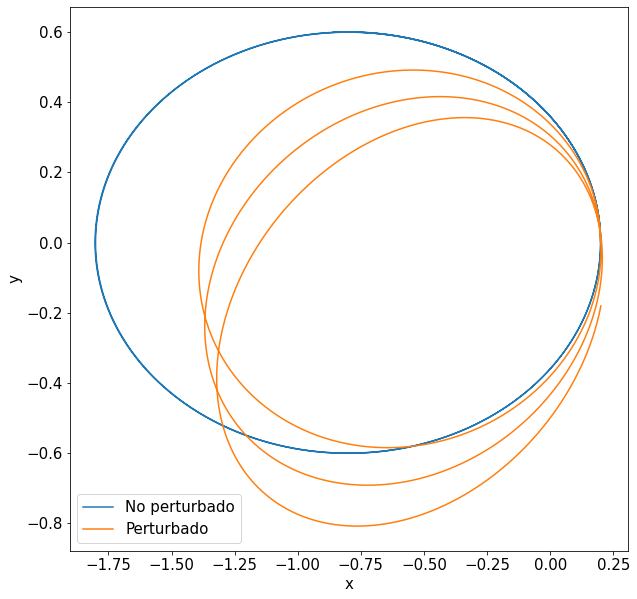

In [25]:
plt.figure(figsize=(10,10))
plt.plot(coordinates[0], coordinates[1], label='No perturbado')
plt.plot(coordinates_perturbated[0], coordinates_perturbated[1], label='Perturbado')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [26]:
idx_pert = np.argwhere(np.diff(np.sign(coordinates_perturbated[1]))).flatten()
x_values_pert = np.array(coordinates_perturbated[0])[idx_pert]
vx_values_pert = np.array(coordinates_perturbated[2])[idx_pert]

Text(0, 0.5, '$v_x$')

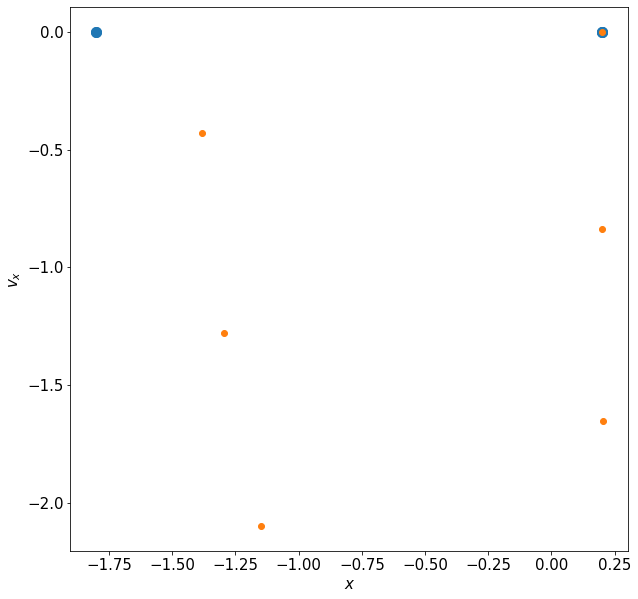

In [28]:
plt.figure(figsize=(10,10))

plt.scatter(x_values, vx_values, label='No Perturbado', s=100)
plt.scatter(x_values_pert, vx_values_pert, label='No Perturbado')

plt.xlabel('$x$')
plt.ylabel('$v_x$')